In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.base import BaseEstimator, RegressorMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_california_housing
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

train_adult = pd.read_csv("DataSets/census/adult.data", header=None, names=columns, sep=",", na_values=" ?", skipinitialspace=True)
test_adult = pd.read_csv("DataSets/census/adult.test", header=0, names=columns, sep=",", na_values=" ?", skipinitialspace=True, comment='|')
test_adult['income'] = test_adult['income'].str.replace('.', '', regex=False)

data_adult = pd.concat([train_adult, test_adult], ignore_index=True).dropna()


In [27]:
housing = fetch_california_housing()

X = housing.data
y = housing.target

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("\nFeature names:")
print(housing.feature_names)

Features (X) shape: (20640, 8)
Target (y) shape: (20640,)

Feature names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# Part 1: Feature-Level Interpretability (30 marks)  
You will use the California Housing and the Adult Census Income datasets in this part. You 
should train one feed-forward neural network for each dataset and apply the following 
interpretability techniques:

In [7]:
# Adult Census Income Dataset pre-processing and neural network model

X_adult = data_adult.drop("income", axis=1)
y_adult = (data_adult["income"] == ">50K").astype(int)

# Identify categorical and numerical columns
cat_cols = X_adult.select_dtypes(include=['object']).columns
num_cols = X_adult.select_dtypes(exclude=['object']).columns

# Encode categorical & scale numeric
ct = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('scale', StandardScaler(), num_cols)
])

X_processed_adult = ct.fit_transform(X_adult)
X_train_adult, X_val_adult, y_train_adult, y_val_adult = train_test_split(X_processed_adult, y_adult, test_size=0.2, random_state=42)

input_dim = X_train_adult.shape[1]

# The feed-forward neural network model
model = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(
    X_train_adult, y_train_adult,
    validation_data=(X_val_adult, y_val_adult),
    epochs=10,
    batch_size=256,
    verbose=1
)

# Evaulate the model
loss, acc = model.evaluate(X_val_adult, y_val_adult, verbose=0)
print(f"Validation Accuracy: {acc:.4f}")

Epoch 1/10


c:\Users\jamie\OneDrive\Desktop\Interpretable AI Project\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7881 - loss: 0.4447 - val_accuracy: 0.8539 - val_loss: 0.3168
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8530 - loss: 0.3196 - val_accuracy: 0.8552 - val_loss: 0.3121
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8553 - loss: 0.3113 - val_accuracy: 0.8576 - val_loss: 0.3095
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8589 - loss: 0.3074 - val_accuracy: 0.8575 - val_loss: 0.3077
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8579 - loss: 0.3073 - val_accuracy: 0.8584 - val_loss: 0.3081
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8606 - loss: 0.3047 - val_accuracy: 0.8594 - val_loss: 0.3061
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8591 - loss: 0.3059 - val_accuracy: 0.8584 - val_loss: 0.3073
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8607 - loss: 0.3010 - val_accuracy: 0.8598 - val_

"\n\nfrom scikeras.wrappers import KerasClassifier\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder, StandardScaler\nfrom sklearn.inspection import PartialDependenceDisplay\nimport matplotlib.pyplot as plt\n\n# Wrap the Keras model\ndef create_model():\n    model = Sequential([\n        Dense(128, activation='relu', input_dim=input_dim),\n        Dropout(0.3),\n        Dense(64, activation='relu'),\n        Dropout(0.3),\n        Dense(1, activation='sigmoid')\n    ])\n    model.compile(optimizer=Adam(learning_rate=0.001),\n                  loss='binary_crossentropy', metrics=['accuracy'])\n    return model\n\n# Wrap in scikit-learn compatible estimator\nsklearn_model = KerasClassifier(model=create_model, epochs=10, batch_size=256, verbose=0)\nsklearn_model.fit(X_train_adult, y_train_adult)  # Train the model\n"

In [28]:
# California Housing Dataset pre-processing and neural network model

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

print(f"Total data points: {len(X)}")
print(f"Training data points: {len(X_train)}")
print(f"Validation data points: {len(X_valid)}")
print(f"Test data points: {len(X_test)}")


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

print("Data successfully scaled")
print(f"Original mean (first feature): {X_train[:, 0].mean():.4f}")
print(f"Scaled mean (first feature): {X_train_scaled[:, 0].mean():.4f}")


def create_model():

    n_features = X_train_scaled.shape[1]

    model = keras.Sequential([
        layers.Dense(64, activation="relu", input_shape=[X_train_scaled.shape[1]]),
        layers.Dropout(0.2),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(16, activation="relu"),
        layers.Dense(1)
    ])
    
    model.compile(
        loss="mean_squared_error",
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        metrics=["mean_absolute_error"]
    )
    
    return model

model = KerasRegressor(
    model=create_model,
    verbose=0
)

print("Keras Wrapper created successfully")

print("Model compiled with MSE as the loss function and Dropout Layers and a custom Adam.")

print("--- Starting Model Training ---")

early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=[early_stopping],
    verbose=1
)

print("--- Model Training Finished ---")

print("--- Evaluating Model on Test Set ---")

y_pred = model.predict(X_test_scaled)

final_mse = mean_squared_error(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)

print(f"Final Test Set MSE (Mean Squared Error): {final_mse:.4f}")
print(f"Final Test Set MAE (Mean Absolute Error): {final_mae:.4f}")

Total data points: 20640
Training data points: 13209
Validation data points: 3303
Test data points: 4128
Data successfully scaled
Original mean (first feature): 3.8689
Scaled mean (first feature): -0.0000
Keras Wrapper created successfully
Model compiled with MSE as the loss function and Dropout Layers and a custom Adam.
--- Starting Model Training ---
Epoch 1/100


c:\UoM\Year 3\ARI3205 Interpretable AI for DL Models\interpretableaiproject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2859 - mean_absolute_error: 0.7880 - val_loss: 0.5875 - val_mean_absolute_error: 0.5165
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5752 - mean_absolute_error: 0.5398 - val_loss: 0.4482 - val_mean_absolute_error: 0.4604
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4982 - mean_absolute_error: 0.4958 - val_loss: 0.4064 - val_mean_absolute_error: 0.4544
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4545 - mean_absolute_error: 0.4799 - val_loss: 0.4003 - val_mean_absolute_error: 0.4462
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4330 - mean_absolute_error: 0.4689 - val_loss: 0.4005 - val_mean_absolute_error: 0.4414
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4238 - mean_absolute_error: 0.4626 - val_loss: 0.3845 - val_mean_absolute_error: 0.4452
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4024 - mean_absolute_error: 0.4508 - val_lo

## 1. Partial Dependence Plots (PDP) and Individual Conditional Expectation (ICE) plots (7 marks) 
### a. Use PDP to examine the average effect of at least two features. 

In [44]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Select only numeric features for PDP
X_train_numeric = X_train_adult[:, -len(num_cols):]  # last columns are scaled numeric
numeric_feature_names = list(num_cols)  # ['age', 'fnlwgt', 'education-num', ...]

# Wrap your trained model
class KerasWrapper:
    def __init__(self, model):
        self.model = model

    def fit(self, X, y=None):
        return self

    def predict_proba(self, X):
        probs = self.model.predict(X, verbose=0).flatten()
        return np.vstack([1 - probs, probs]).T

wrapped_model = KerasWrapper(model)
wrapped_model.fit(X_train_numeric)

# Pick features: 'age' and 'hours-per-week'
features_for_pdp = ['age', 'hours-per-week']
feature_indices = [numeric_feature_names.index(f) for f in features_for_pdp]

# Plot PDP
PartialDependenceDisplay.from_estimator(
    wrapped_model,
    X_train_numeric,
    features=feature_indices,
    feature_names=numeric_feature_names,
    grid_resolution=20
)
plt.suptitle("Partial Dependence: Education × Hours-per-week", fontsize=14)
plt.tight_layout()
plt.show()


NameError: name 'X_train_adult' is not defined

--- Generating PDPs using the 'shap' library (with fix) ---
Successfully extracted fitted Keras model from KerasRegressor.

Calculating and plotting PDP for 'MedInc'...
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
413/413 ━━━━━━━━━━━━━━

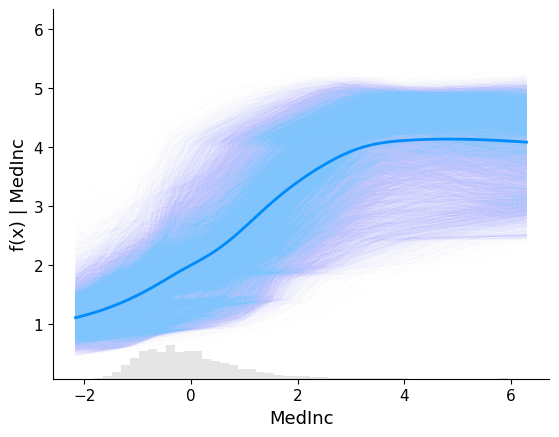


Calculating and plotting PDP for 'HouseAge'...
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 

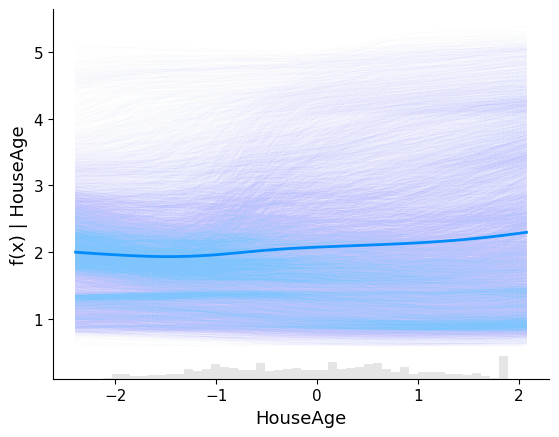

In [ ]:
import shap
import matplotlib.pyplot as plt

print("--- Generating PDPs using the 'shap' library (with fix) ---")

# 1. Get the *actual* fitted Keras model from the wrapper
try:
    actual_keras_model = model.model_
    print("Successfully extracted fitted Keras model from KerasRegressor.")
except AttributeError:
    print("FATAL ERROR: Could not find '.model_' attribute.")
    print("This assumes 'model' is the KerasRegressor object you trained in Step 7.")
    raise

# 2. Get the original feature names
original_feature_names = housing.feature_names

# 3. --- THIS IS THE FIX ---
# Keras .predict() returns shape (n, 1), but SHAP expects (n,).
# We create a simple lambda function to "flatten" the output using .ravel()
predict_fn = lambda X: actual_keras_model.predict(X).ravel()


# 4. Create the PDP for 'MedInc'
print("\nCalculating and plotting PDP for 'MedInc'...")
shap.plots.partial_dependence(
    "MedInc",                     # The feature to plot (by name)
    predict_fn,                   # <-- Use our new wrapper function
    X_train_scaled,               # The data to average over
    feature_names=original_feature_names,
    show=True                     # Tell shap to show the plot
)

# 5. Create the PDP for 'HouseAge'
print("\nCalculating and plotting PDP for 'HouseAge'...")
shap.plots.partial_dependence(
    "HouseAge",                   # The feature to plot
    predict_fn,                   # <-- Use our new wrapper function
    X_train_scaled,
    feature_names=original_feature_names,
    show=True
)

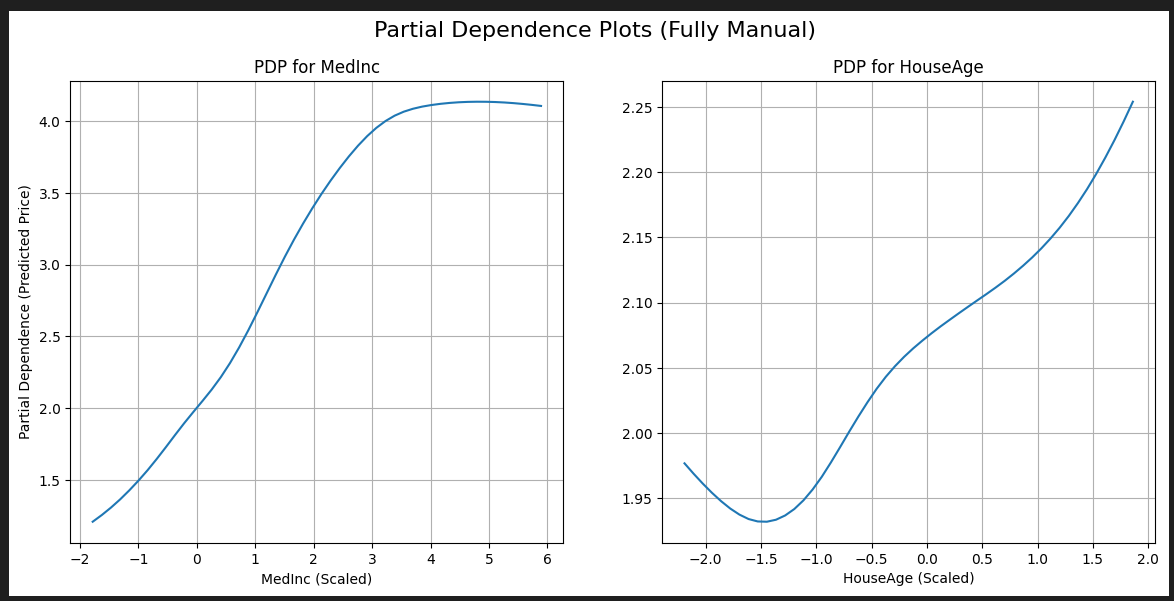

### b. Use ICE plots to explore individual predictions for at least two features. 

### c. Explain what insights PDP and ICE give about the model’s behaviour.

PDP and ICE Interpretation:


## 2. Permutation Feature Importance (PFI) (7 marks) 
### a. Use PFI to identify the most important features in the model. 


### b. Explain what the term “important” means when using the PFI method. 

## 3. Accumulated Local Effects (ALE) (9 marks) 
### a. Implement ALE plots to investigate the local effects of feature changes. 

### b. Compare ALE with PDP and discuss any differences in the interpretability of these techniques.

## 4. Global Surrogates (7 marks) 
### a. Build an interpretable model to approximate the predictions of the feed-forward neural network model. 

### b. Analyse the surrogate model's effectiveness and discuss when such approximations are helpful.